In [1]:
!pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv('seaice.csv')

In [4]:
df.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north


In [5]:
df.tail()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
26349,2019,5,27,10.085,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26350,2019,5,28,10.078,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26351,2019,5,29,10.219,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26352,2019,5,30,10.363,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26353,2019,5,31,10.436,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south


In [6]:
df = df[df.iloc[:,6]=='north']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13177 entries, 0 to 13176
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          13177 non-null  int64  
 1    Month        13177 non-null  int64  
 2    Day          13177 non-null  int64  
 3        Extent   13177 non-null  float64
 4       Missing   13177 non-null  float64
 5    Source Data  13177 non-null  object 
 6   hemisphere    13177 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
df.iloc[:,4].value_counts()

    Missing
0.0    13177
Name: count, dtype: int64

In [9]:
years_list = list(df['Year'].value_counts().index)
years_list = sorted(years_list)

In [10]:
# Calcule monthly average of sea ice extent
def by_months(df):    
    n_months = 3 + ((2019-1979) * 12) + 5 
    df_monthly = pd.DataFrame(columns=['Year', 'Month', 'Extent'], index=range(n_months))
    i = 0
    for year in years_list:
        
        if year == 1978:
            months_list = range(10,13)
        elif year == 2019:
            months_list = range(1,6)
        else:
            months_list = range(1,13)

        for month in months_list:
            subset = df[df['Year']==year][df.iloc[:,1]==month]
            monthly_mean = np.mean(subset.iloc[:,3])
            df_monthly.iloc[i] = [year, month, monthly_mean]
            i += 1

    return df_monthly

df_clean = by_months(df)

C:\Users\HEMANT\AppData\Local\Temp\ipykernel_8392\26121591.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[df['Year']==year][df.iloc[:,1]==month]
C:\Users\HEMANT\AppData\Local\Temp\ipykernel_8392\26121591.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[df['Year']==year][df.iloc[:,1]==month]
C:\Users\HEMANT\AppData\Local\Temp\ipykernel_8392\26121591.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[df['Year']==year][df.iloc[:,1]==month]
C:\Users\HEMANT\AppData\Local\Temp\ipykernel_8392\26121591.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[df['Year']==year][df.iloc[:,1]==month]
C:\Users\HEMANT\AppData\Local\Temp\ipykernel_8392\26121591.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[df['Year']==year][df.iloc[:,1]==month]
C:\Users\HEMANT\AppData\L

In [11]:
df_clean.head()

,Year,Month,Extent
0,1978,10,10.402667
1,1978,11,11.645133
2,1978,12,13.667063
3,1979,1,15.414
4,1979,2,16.175286


In [12]:
# Sort the dataset per month and year
df_clean = df_clean.sort_values(['Month', 'Year'])
df_clean = df_clean.reset_index().drop(['index'], axis=1)
df_clean.head()

,Year,Month,Extent
0,1979,1,15.414
1,1980,1,14.861875
2,1981,1,14.909688
3,1982,1,15.176733
4,1983,1,14.942438


In [13]:
df_clean.tail()

,Year,Month,Extent
483,2014,12,12.352581
484,2015,12,12.044774
485,2016,12,11.459419
486,2017,12,11.742677
487,2018,12,11.856516


In [14]:
mean_years = []
std_dict = {}
for m in range(1,13):
  #Calcule mu and std values
  mu = df_clean[df_clean.Month == m]['Extent'].mean()
  std = df_clean[df_clean.Month == m]['Extent'].std()
  #Save mu and std values
  mean_years.append(mu)
  std_dict[m] = std

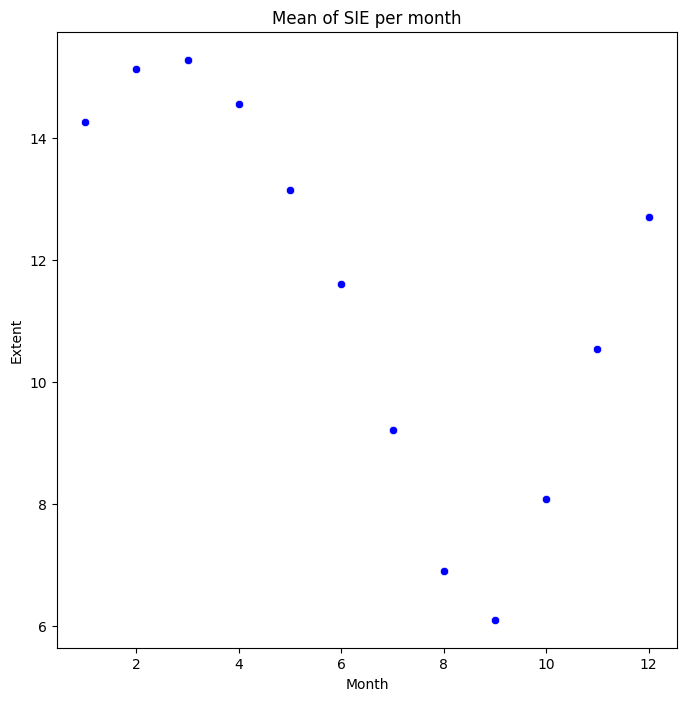

In [15]:
df_mean_years = pd.DataFrame(mean_years)
df_mean_years['Month'] = range(1, 13)
df_mean_years.columns = ['Extent', 'Month']
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Month', y='Extent', data=df_mean_years,  color='blue', sizes=20).set(title='Mean of SIE per month')
plt.show()

In [16]:
#Compute Sea Ice Extent anomalies
def anomaliesSIE(df):
  #Calcule mean by months from 1981-2010
  df_30y = df.query('1981 <= Year <= 2010')
  df_30y = df_30y.reset_index().drop(['index'], axis=1)
  mean_30y = []
  for m in range(1,13):
    mu = df[df.Month == m]['Extent'].mean()
    mean_30y.append(mu)

  #Compute SIE anomalies
  anomalies_list = []
  for s in range(0, len(df)):
    mean_30y_index = df.loc[s, 'Month']-1
    #Calcule anomalies
    anomalies_SIE = df.loc[s, 'Extent'] - mean_30y[mean_30y_index]
    anomalies_SIE = anomalies_SIE/mean_30y[mean_30y_index]*100
    #Save anomalies
    anomalies_list.append(anomalies_SIE)
  df['AnomaliesSIE'] = anomalies_list
  return df, mean_30y

df_SIE, mean_30y = anomaliesSIE(df_clean)
df_SIE.head()

,Year,Month,Extent,AnomaliesSIE
0,1979,1,15.414,8.034332
1,1980,1,14.861875,4.164574
2,1981,1,14.909688,4.499684
3,1982,1,15.176733,6.371367
4,1983,1,14.942438,4.729224


C:\Users\HEMANT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


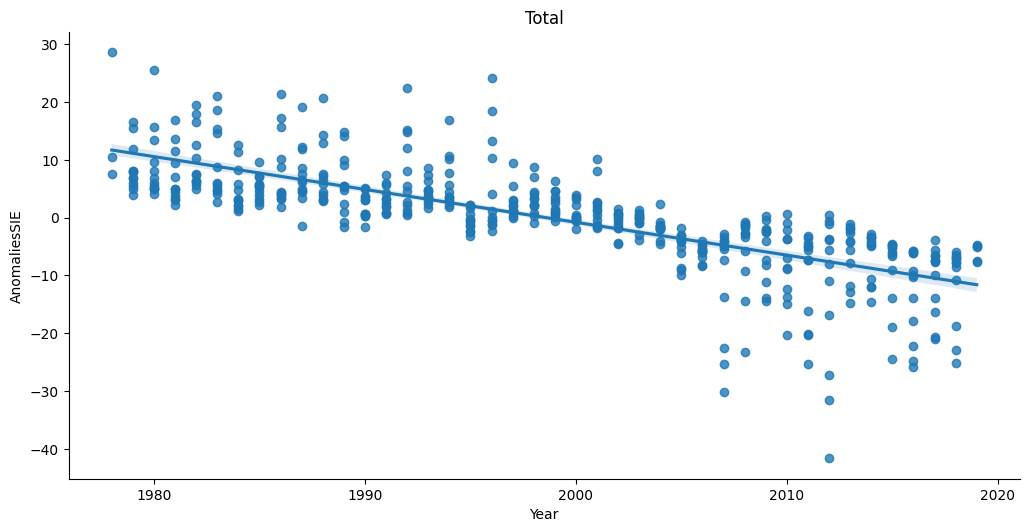

C:\Users\HEMANT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


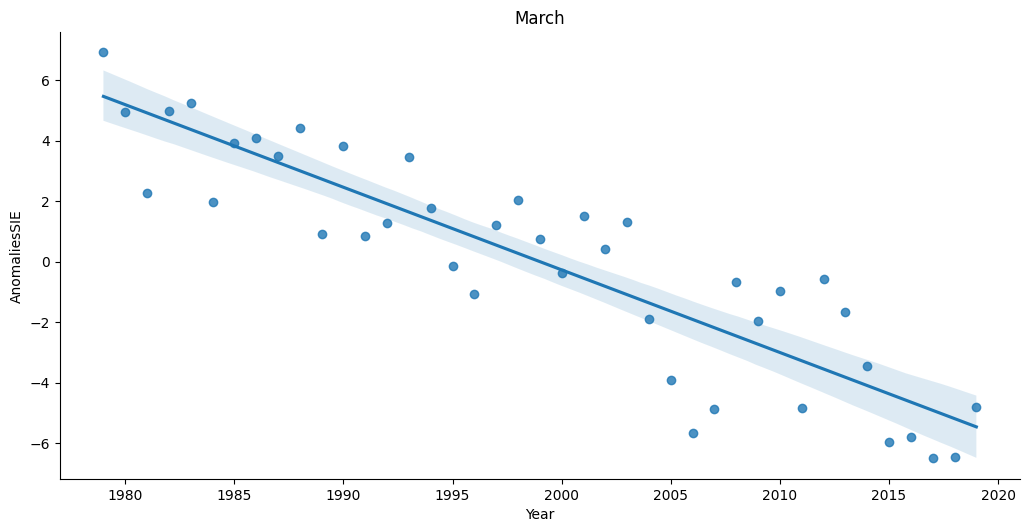

C:\Users\HEMANT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


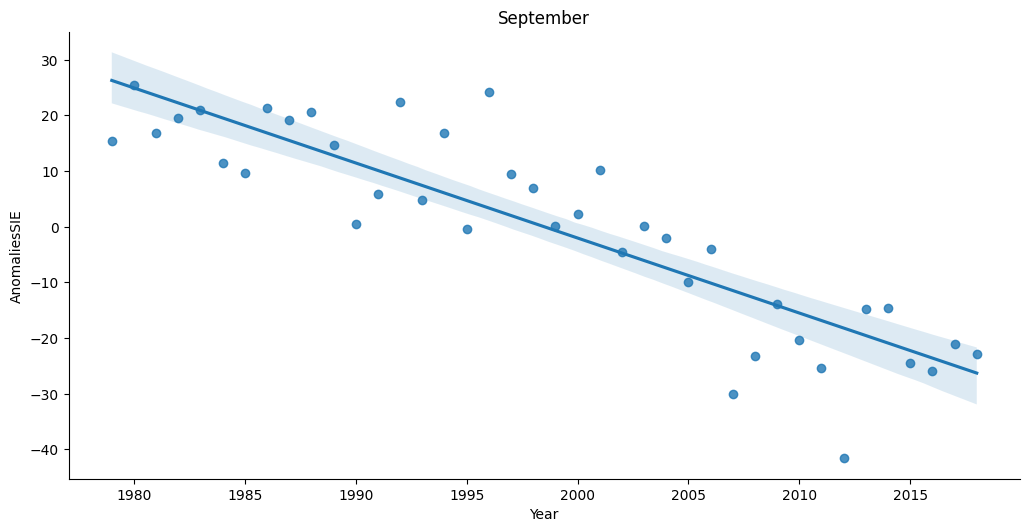

In [17]:
df_SIE['Year'] = pd.to_numeric(df_SIE['Year'])
#Total
sns.lmplot(x='Year', y='AnomaliesSIE', data=df_SIE, height=5.2, aspect=2).set(title='Total')
plt.show()
#January
sns.lmplot(x='Year', y='AnomaliesSIE', data=df_SIE[df_SIE.Month == 3], height=5.2, aspect=2).set(title='March')
plt.show()
#June
sns.lmplot(x='Year', y='AnomaliesSIE', data=df_SIE[df_SIE.Month == 9], height=5.2, aspect=2).set(title='September')
plt.show()

In [18]:
y = np.asarray(df_SIE.AnomaliesSIE, dtype=float)  # response variable
X = np.asarray(df_SIE[['Year', 'Month']], dtype=float) # predictor
X = sm.add_constant(X)  

In [19]:
est = sm.OLS(y, X)

In [20]:
est = est.fit()

In [21]:
print(est.params)
print('MSE: ', est.mse_total)
print('R_squared: ', est.rsquared)

[ 1.13671665e+03 -5.68560625e-01 -6.16896526e-02]
MSE:  78.56903611185444
R_squared:  0.5681501577095515


In [22]:
est.params[1]*10

-5.6856062513188

In [23]:
yrs = int(input("Enter The Year : "))

Enter The Year :  2026


In [24]:
X_sep2028 = np.array([1, yrs, 9])
AnomaliesSIE_sep2028 = float(est.predict(X_sep2028))
AnomaliesSIE_sep2028

-15.742378562301216

In [25]:
#Calcule sea ice extent in September 2025
extent_sep2028 = (AnomaliesSIE_sep2028*mean_30y[8]/100)+mean_30y[8]
extent_sep2028 = round(extent_sep2028, 3)
extent_sep2028

5.147

In [26]:
extent_sep1979 = df_clean[df_clean.Year == 1979].reset_index().loc[8, 'Extent']
print('sep_1979:', extent_sep1979, 'sep_2025:', extent_sep2028)

sep_1979: 7.051133333333332 sep_2025: 5.147


In [27]:
#Calcule sea ice extent loss 
loss_SIE = round(extent_sep1979-extent_sep2028,3)
loss_SIE

1.904

In [28]:
import pickle

In [29]:
data = {'est': est, 'mean_30y': mean_30y, 'df_clean': df_clean}

In [30]:
with open('model_pickle', 'wb') as f:
  pickle.dump(data,f)

In [33]:
with open('model_pickle', 'rb') as f:
    loaded_data = pickle.load(f)

In [34]:
est = loaded_data['est']
mean_30y = loaded_data['mean_30y']
df_clean = loaded_data['df_clean']

In [36]:
yrs = int(input("Enter The Year : "))

X_sep2028 = np.array([1, yrs, 9])
AnomaliesSIE_sep2028 = float(est.predict(X_sep2028))
AnomaliesSIE_sep2028

#Calcule sea ice extent in September 2025
extent_sep2028 = (AnomaliesSIE_sep2028*mean_30y[8]/100)+mean_30y[8]
extent_sep2028 = round(extent_sep2028, 3)
extent_sep2028

extent_sep1979 = df_clean[df_clean.Year == 1979].reset_index().loc[8, 'Extent']
print('sep_1979:', extent_sep1979, 'sep_2025:', extent_sep2028)

#Calcule sea ice extent loss 
loss_SIE = round(extent_sep1979-extent_sep2028,3)
loss_SIE

Enter The Year :  2028


sep_1979: 7.051133333333332 sep_2025: 5.077


1.974